In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from dmba import classificationSummary
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [113]:
# Load the dataset
data = pd.read_csv('heart_failure_clinical_records_dataset.csv') 

# Data Description

In [114]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [115]:
print (data.shape)

(299, 13)


In [116]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [117]:
 # Summary of the dataset
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


# Data Visualization

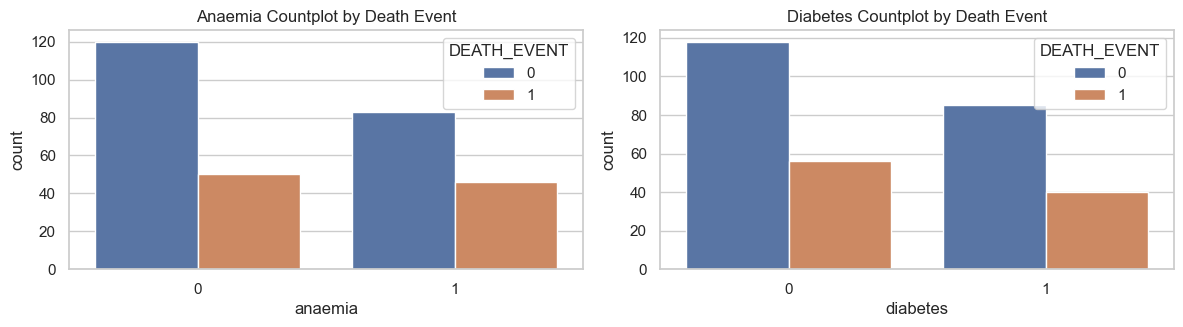

In [135]:
# Visualization 6: Countplot for Anaemia, Diabetes, High Blood Pressure, Smoking
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.countplot(data=data, x="anaemia", hue="DEATH_EVENT")
plt.title("Anaemia Countplot by Death Event")

plt.subplot(2, 2, 2)
sns.countplot(data=data, x="diabetes", hue="DEATH_EVENT")
plt.title("Diabetes Countplot by Death Event")

plt.tight_layout()
plt.show()

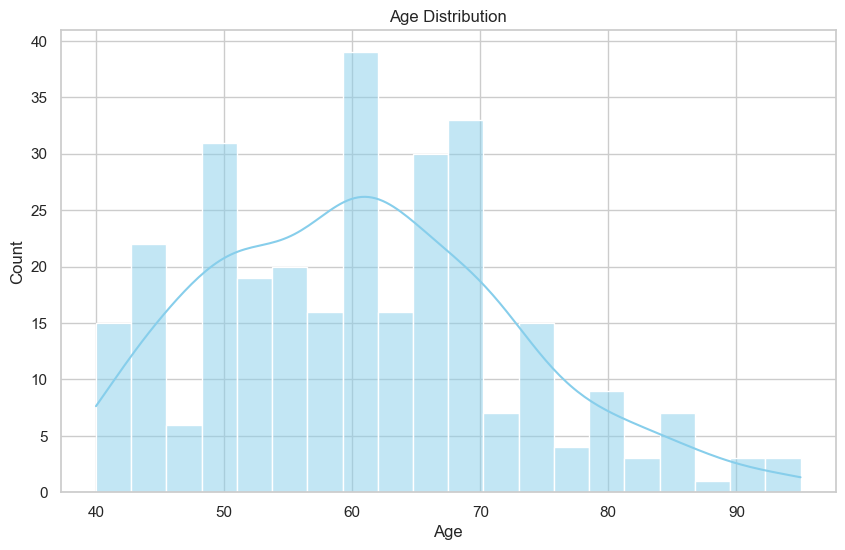

In [118]:
# Set the style for the plots
sns.set(style="whitegrid")

# Visualization 1: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

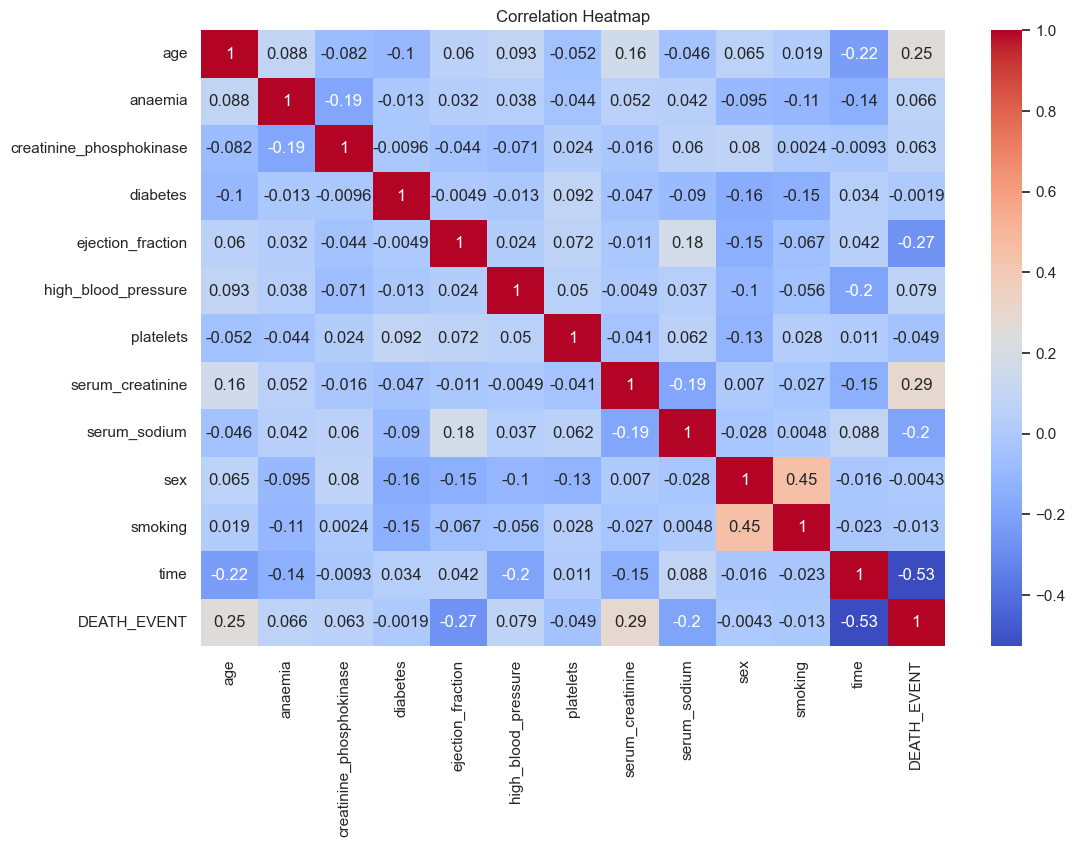

In [119]:
# Visualization 2: Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


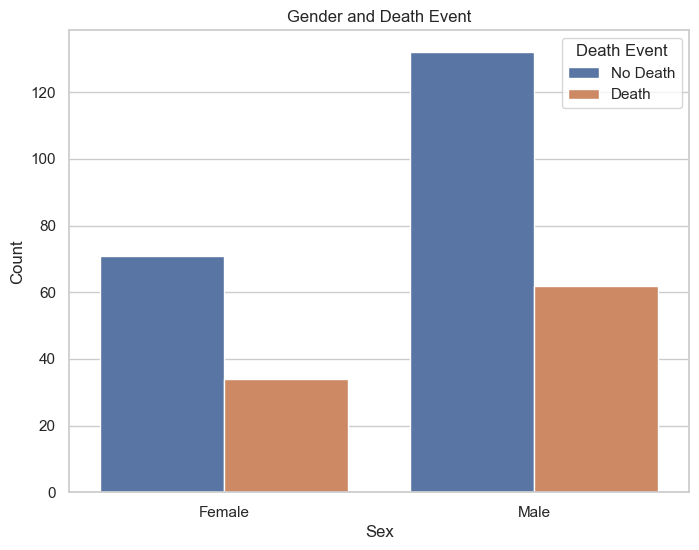

In [128]:
# Visualization 4: Gender and Death Event
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='DEATH_EVENT', data=data)
plt.title("Gender and Death Event")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Death Event", loc='upper right', labels=["No Death", "Death"])
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

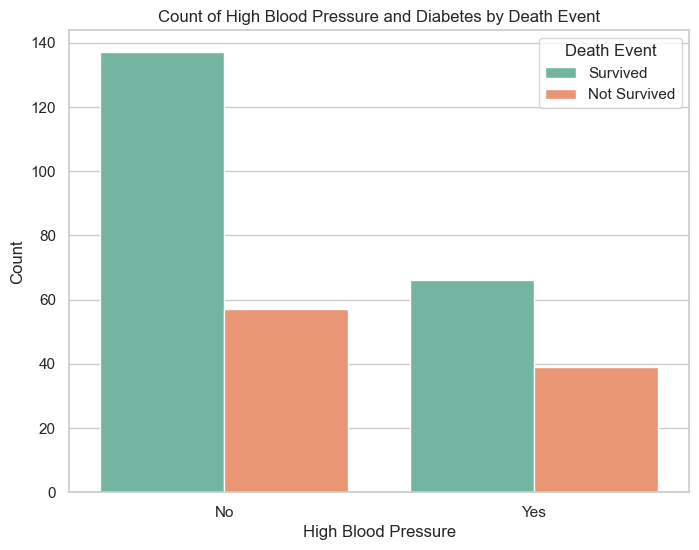

In [130]:
# Visualization 6: Countplot of High Blood Pressure and Diabetes by Death Event
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='high_blood_pressure', hue='DEATH_EVENT', palette='Set2')
plt.title('Count of High Blood Pressure and Diabetes by Death Event')
plt.xlabel('High Blood Pressure')
plt.ylabel('Count')
plt.legend(title='Death Event', labels=['Survived', 'Not Survived'])
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()






In [79]:
# Preprocessing
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']
train_X, valid_X, train_y,valid_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest

In [80]:
rf = RandomForestClassifier(random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(random_state=1)

In [81]:
train_pred = rf.predict(train_X)
valid_pred = rf.predict(valid_X)

In [82]:
# Calculate Metrics for Training Data
train_cm = confusion_matrix(train_y, train_pred)
train_accuracy = accuracy_score(train_y, train_pred)
train_precision = precision_score(train_y, train_pred)
train_recall = recall_score(train_y, train_pred)
train_f1_score = f1_score(train_y, train_pred)


In [83]:
# Calculate Metrics for Validation Data
valid_cm = confusion_matrix(valid_y, valid_pred)
valid_accuracy = accuracy_score(valid_y, valid_pred)
valid_precision = precision_score(valid_y, valid_pred)
valid_recall = recall_score(valid_y, valid_pred)
valid_f1_score = f1_score(valid_y, valid_pred)

In [84]:
# Print the Metrics
print("Random Forest Metrics:")
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1_score)
print("\nValidation Accuracy:", valid_accuracy)
print("Validation Precision:", valid_precision)
print("Validation Recall:", valid_recall)
print("Validation F1 Score:", valid_f1_score)

Random Forest Metrics:
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0

Validation Accuracy: 0.7
Validation Precision: 0.7058823529411765
Validation Recall: 0.48
Validation F1 Score: 0.5714285714285713


# neural network

In [85]:
clf = MLPClassifier(hidden_layer_sizes=(200, 100), activation='logistic', solver='adam', max_iter=2000, batch_size=32)

In [86]:
clf.fit(train_X, train_y.values)

MLPClassifier(activation='logistic', batch_size=32,
              hidden_layer_sizes=(200, 100), max_iter=2000)

In [87]:
y_pred_train = clf.predict(train_X)
y_pred_valid = clf.predict(valid_X)


In [88]:
# Accuracy, Precision, Recall, and F1-score
print('Training Performance:')
print('Accuracy:', accuracy_score(train_y, y_pred_train))
print('Precision:', precision_score(train_y, y_pred_train))
print('Recall:', recall_score(train_y, y_pred_train))
print('F1-score:', f1_score(train_y, y_pred_train))

print('Validation Performance:')
print('Accuracy:', accuracy_score(valid_y, y_pred_valid))
print('Precision:', precision_score(valid_y, y_pred_valid))
print('Recall:', recall_score(valid_y, y_pred_valid))
print('F1-score:', f1_score(valid_y, y_pred_valid))

Training Performance:
Accuracy: 0.702928870292887
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Validation Performance:
Accuracy: 0.5833333333333334
Precision: 0.0
Recall: 0.0
F1-score: 0.0


C:\Users\babat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\babat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression

In [93]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Create and fit the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(train_X, train_y)

# Predictions on training and validation data
y_pred_train_logreg = logreg.predict(train_X)
y_pred_valid_logreg = logreg.predict(valid_X)

# Calculate metrics for training data
train_accuracy = accuracy_score(train_y, y_pred_train_logreg)
train_precision = precision_score(train_y, y_pred_train_logreg, average='binary', zero_division=1)
train_recall = recall_score(train_y, y_pred_train_logreg, average='binary', zero_division=1)
train_f1 = f1_score(train_y, y_pred_train_logreg, average='binary', zero_division=1)

# Calculate metrics for validation data
valid_accuracy = accuracy_score(valid_y, y_pred_valid_logreg)
valid_precision = precision_score(valid_y, y_pred_valid_logreg, average='binary', zero_division=1)
valid_recall = recall_score(valid_y, y_pred_valid_logreg, average='binary', zero_division=1)
valid_f1 = f1_score(valid_y, y_pred_valid_logreg, average='binary', zero_division=1)

# Display metrics
print("Training Metrics:")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Training F1 Score: {train_f1:.2f}")

print("\nValidation Metrics:")
print(f"Validation Accuracy: {valid_accuracy:.2f}")
print(f"Validation Precision: {valid_precision:.2f}")
print(f"Validation Recall: {valid_recall:.2f}")
print(f"Validation F1 Score: {valid_f1:.2f}")



Training Metrics:
Training Accuracy: 0.84
Training Precision: 0.77
Training Recall: 0.66
Training F1 Score: 0.71

Validation Metrics:
Validation Accuracy: 0.80
Validation Precision: 0.88
Validation Recall: 0.60
Validation F1 Score: 0.71


In [94]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [102]:
# Create a DataFrame for the new patient with named columns
new_patient_data = pd.DataFrame(columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
                                         'ejection_fraction', 'high_blood_pressure', 'platelets',
                                         'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
                                data=[[20, 1, 100, 1, 50, 0, 265000, 1.2, 100, 1, 0, 200]])

In [103]:
# Predict for the new patient using the trained Logistic Regression model
prediction = logreg.predict(new_patient_data)
print(f"Predicted DEATH_EVENT for new patient: {prediction[0]}")

Predicted DEATH_EVENT for new patient: 0
